In [1]:
# Set up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import graphviz

%matplotlib inline
import matplotlib as mpl #add'1 plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high res figures

In [4]:
# Import dataset as dataframe

df = pd.read_excel("/Users/ashleysanders/Code/DataSci/data/Wellbeing_job-loss/wellbeing_job_loss.xlsx")

## Initial data exploration

In [5]:
df.head()

,country-name,country,region,age_group,gender,income_group,smoker,current_living_area,mortgage,boredom,loneliness,troublesleep,anxiety,lostjob,MWLI,laborstatus,attended_religious_services
0,china,1,1,1.0,1.0,3.0,0,0,0,1,0,0,0,0,-0.516047,2,0
1,china,1,1,5.0,0.0,1.0,0,2,0,0,0,0,0,1,-1.203705,1,0
2,china,1,1,3.0,1.0,1.0,0,2,0,1,1,0,1,1,1.295818,3,0
3,china,1,1,0.0,0.0,0.0,0,2,0,0,0,0,0,0,-1.203705,0,0
4,china,1,1,5.0,0.0,0.0,1,2,0,1,0,1,1,1,1.261216,3,0


In [6]:
df.shape

(6089, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country-name                 6089 non-null   object 
 1   country                      6089 non-null   int64  
 2   region                       6089 non-null   int64  
 3   age_group                    6084 non-null   float64
 4   gender                       6085 non-null   float64
 5   income_group                 5950 non-null   float64
 6   smoker                       6089 non-null   int64  
 7   current_living_area          6089 non-null   int64  
 8   mortgage                     6089 non-null   int64  
 9   boredom                      6089 non-null   int64  
 10  loneliness                   6089 non-null   int64  
 11  troublesleep                 6089 non-null   int64  
 12  anxiety                      6089 non-null   int64  
 13  lostjob           

---------------------------------------------------------
It looks like there are 5 missing values for age-group; 4 for gender; and 145 for income_group. This bears further examination to determine possible reasons and meanings for the missing data before determinig how to handle them.

These variables are also listed as float instead of integers, so I will change convert these variables for consistency after examining their value counts. 

In [22]:
df['country-name'].unique()

array(['china', 'italy', 'japan', 'korea', 'uk', 'us'], dtype=object)

In [25]:
df['country-name'].value_counts()

country-name
us       1055
italy    1044
uk       1016
japan    1015
china     996
korea     963
Name: count, dtype: int64

In [8]:
df['age_group'].value_counts()

age_group
3.0    1156
4.0    1132
2.0    1077
0.0    1035
5.0     948
1.0     736
Name: count, dtype: int64

**Definition of age groups:** 
- 0: over 65
- 1: 18-25
- 2: 26-35
- 3: 36-45
- 4: 46-55
- 5: 56-65

In [69]:
df['gender'].value_counts() # 0: male and 1: female. Note that there were likely only 2 options in the survey.

gender
1.0    3138
0.0    2947
Name: count, dtype: int64

Roughly equal numbers of men and women included in the study.

In [11]:
sum(df['gender'].value_counts()) # There are indeed 4 missing values.

6085

In [12]:
df['income_group'].value_counts()

income_group
3.0    1315
2.0    1269
0.0    1137
1.0    1126
4.0    1103
Name: count, dtype: int64

**Definition of income groups:**
This is a categorical variable for different income groups.
- 0: the lowest quantile of income
- 1: the second quantile of income
- 2: the third quantile of income
- 3: the fourth quantile of income
- 4: the highest quantile of income

In [13]:
sum(df['income_group'].value_counts())

5950

The income_group variable has the highest number of missing values, but no reason is given for them in the data dictionary, so these cases need further examination.

## Missing Value Analysis

In [27]:
df['income_group'].isna().value_counts()

income_group
False    5950
True      139
Name: count, dtype: int64

In [52]:
# Create a Boolean mask to identify the missing values in the income_group column
income_mask = df['income_group'].isnull() 

income_mask.value_counts() # Verify that there are 139 missing values identified in the mask.

income_group
False    5950
True      139
Name: count, dtype: int64

In [50]:
# Show the rows with missing values
income_missing = df[income_mask]
income_missing.head(10)

,country-name,country,region,age_group,gender,income_group,smoker,current_living_area,mortgage,boredom,loneliness,troublesleep,anxiety,lostjob,MWLI,laborstatus,attended_religious_services
253,china,1,4,1.0,0.0,NaN,0,2,0,0,0,0,0,0,-1.203705,0,0
332,china,1,7,1.0,1.0,NaN,0,0,0,0,0,0,0,0,-1.203705,0,0
1199,italy,2,27,5.0,1.0,NaN,1,2,0,0,0,0,0,0,-1.203705,0,0
1304,italy,2,29,4.0,1.0,NaN,1,2,0,0,0,1,1,0,0.573558,0,0
1318,italy,2,29,1.0,1.0,NaN,0,1,0,0,0,0,1,1,-0.449369,2,0
1378,italy,2,30,5.0,1.0,NaN,0,2,0,0,0,0,0,0,-1.203705,3,0
1426,italy,2,31,1.0,1.0,NaN,0,1,1,0,0,0,0,1,-1.203705,2,0
1454,italy,2,31,4.0,0.0,NaN,0,1,0,1,1,0,1,1,1.295818,1,0
1496,italy,2,31,5.0,0.0,NaN,1,2,0,1,1,1,1,1,2.318745,0,0
1571,italy,2,31,4.0,1.0,NaN,0,2,0,1,1,1,1,0,2.318745,1,0


The rest of the data for the rows with missing values appears to be valid, so I am hesitant to remove these rows entirely from analysis at this point. I would like to see if there are any trends that distinguish this group from the rest of the data to understand why this information might be missing. 

## Categorical Data Summarization

In [55]:
df['age_cat'] = "none" # create new column for age categorical data

df[['age_group', 'age_cat']].head(10) # verify

,age_group,age_cat
0,1.0,none
1,5.0,none
2,3.0,none
3,0.0,none
4,5.0,none
5,2.0,none
6,2.0,none
7,1.0,none
8,4.0,none
9,0.0,none


In [56]:
# create the category mapping
cat_mapping = {0:'over 65',
               1:'18-25',
               2:'26-35',
               3:'36-45',
               4:'46-55',
               5:'56-65'}

In [57]:
# use the mapping to fill the categorical data column
df['age_cat'] = df['age_group'].map(cat_mapping)

In [59]:
df[['age_cat', 'age_group']].head(10) # verify accuracy

,age_cat,age_group
0,18-25,1.0
1,56-65,5.0
2,36-45,3.0
3,over 65,0.0
4,56-65,5.0
5,26-35,2.0
6,26-35,2.0
7,18-25,1.0
8,46-55,4.0
9,over 65,0.0


<Axes: xlabel='age_cat'>

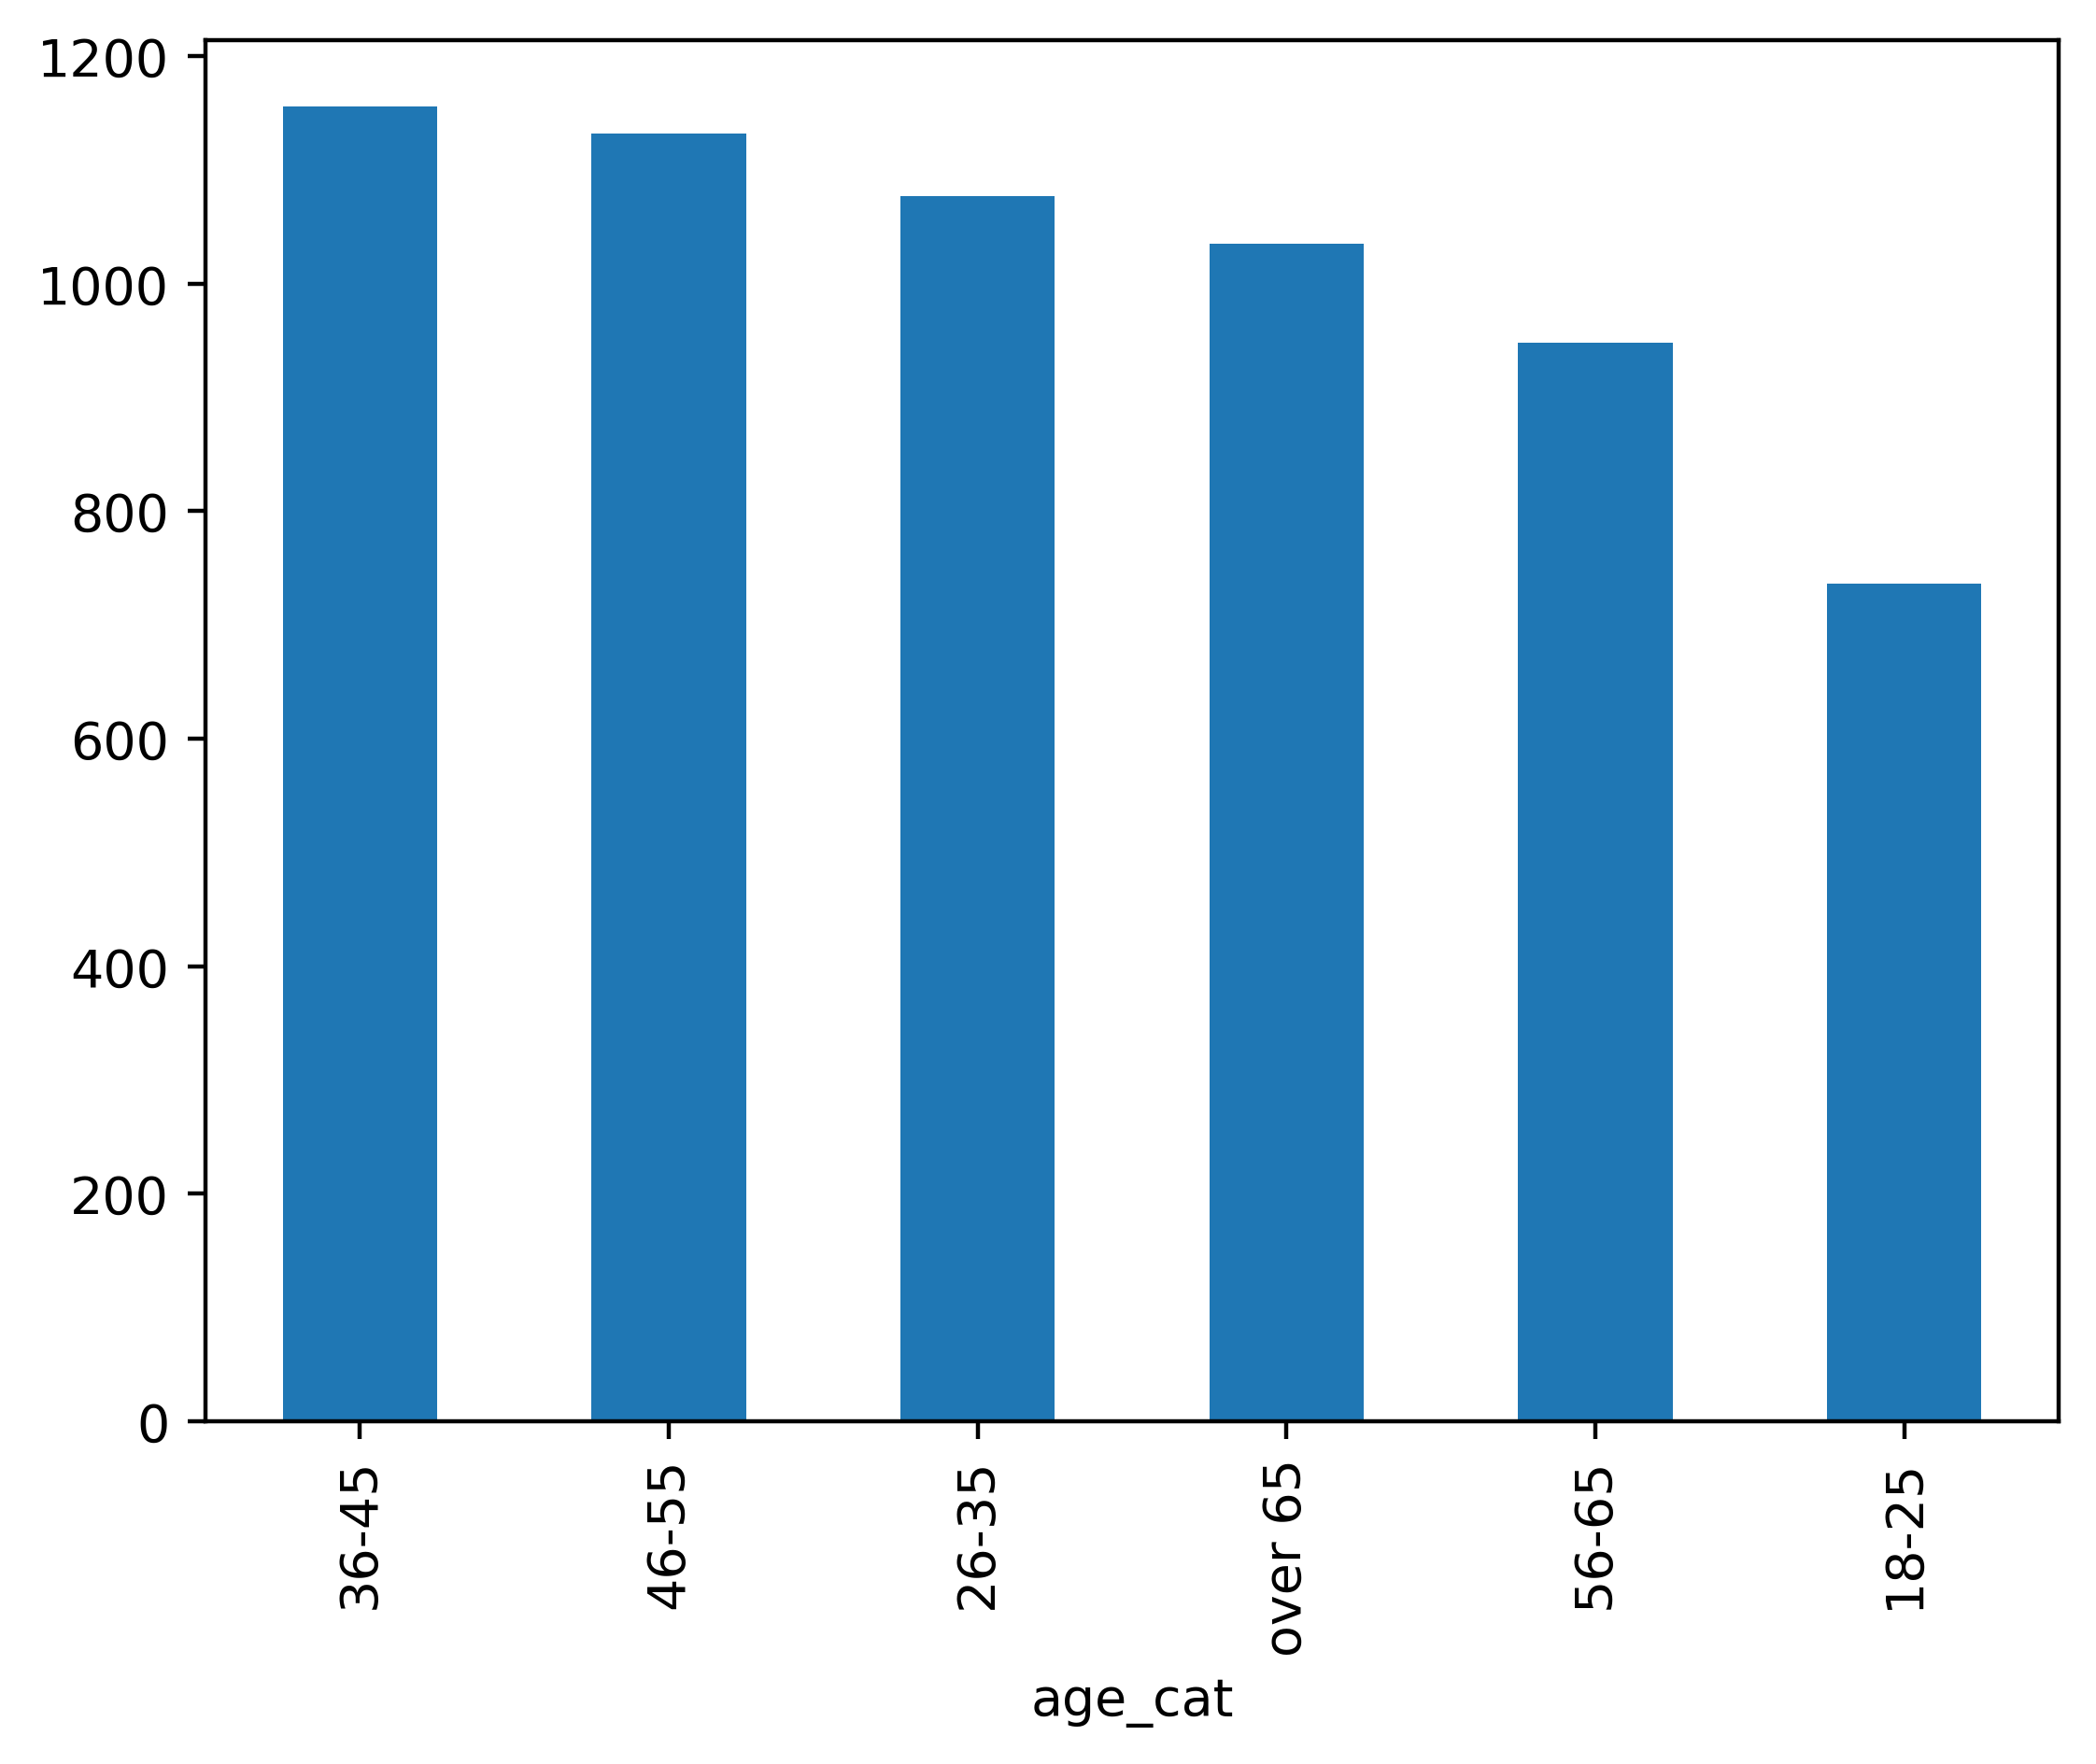

In [67]:
# bar chart of age group distribution

df['age_cat'].value_counts().plot(kind='bar')

In [99]:
df['smoker'].value_counts() # 0: non-smoker; 1: smoker

smoker
0    4331
1    1758
Name: count, dtype: int64

In [92]:
df['anxiety'].value_counts() # one if an individual feels anxious due to pandemic

anxiety
0    3309
1    2780
Name: count, dtype: int64

In [93]:
df['boredom'].value_counts() # one if an individual feels bored due to pandemic

boredom
0    3158
1    2931
Name: count, dtype: int64

In [94]:
df['troublesleep'].value_counts() # one if an individual has insomnia due to pandemic

troublesleep
0    4585
1    1504
Name: count, dtype: int64

In [95]:
df['loneliness'].value_counts() # one if an individual feels lonely due to pandemic

loneliness
0    4502
1    1587
Name: count, dtype: int64

In [96]:
df['lostjob'].value_counts() # one if individual has lost job due to pandemic

lostjob
0    4254
1    1835
Name: count, dtype: int64

In [97]:
df['mortgage'].value_counts() # one if an indivudall has a mortgage

mortgage
0    4409
1    1680
Name: count, dtype: int64

In [88]:
df['current_living_area'].value_counts().sort_index()

# 0 for rural, 1 for semi-urban, 2 for urban

current_living_area
0     822
1    2294
2    2973
Name: count, dtype: int64

In [98]:
df['attended_religious_services'].value_counts() 
# one if an individual attends religious services

attended_religious_services
0    5482
1     607
Name: count, dtype: int64

In [87]:
df['laborstatus'].value_counts().sort_index()

# 0  for individuals not employed,
# 1 for full employed, 
# 2 for part-time employed, 
# 3 for self employed

laborstatus
0    1986
1    2649
2     769
3     685
Name: count, dtype: int64

## Loneliness Correlations

Since I will run several chi-square tests to examine potential correlations between loneliness and other variables, I will use the Bonferri Correction to address the potential for bias due to mutliple tests.

**Intuition:** I would imagine that loneliness is highly correlated with anxiety, trouble sleeping, and job loss. I am curious if there are also trends across gender, age groups, income groups, and rural/urban location. 

In [100]:
from scipy.stats import chi2_contingency

In [101]:
lon_anx = pd.crosstab(df['loneliness'], df['anxiety'])
lon_anx

anxiety,0,1
loneliness,,
0,2638,1864
1,671,916


In [102]:
chi2, p, dof, ex = chi2_contingency(lon_anx, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 125.22677588897963, p-value: 4.5398465495645206e-29


In [103]:
lon_bor = pd.crosstab(df['loneliness'], df['boredom'])
lon_bor

boredom,0,1
loneliness,,
0,2632,1870
1,526,1061


In [104]:
chi2, p, dof, ex = chi2_contingency(lon_bor, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 300.27349321436657, p-value: 2.8720136500308016e-67


In [105]:
lon_job = pd.crosstab(df['loneliness'], df['lostjob'])
lon_job

lostjob,0,1
loneliness,,
0,3343,1159
1,911,676


In [106]:
chi2, p, dof, ex = chi2_contingency(lon_job, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 157.4699084304213, p-value: 4.04082130952028e-36


In [107]:
lon_sleep = pd.crosstab(df['loneliness'], df['troublesleep'])
lon_sleep

troublesleep,0,1
loneliness,,
0,3648,854
1,937,650


In [108]:
chi2, p, dof, ex = chi2_contingency(lon_sleep, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 303.8400046237752, p-value: 4.799335508135462e-68


In [109]:
lon_gen = pd.crosstab(df['loneliness'], df['gender'])
lon_gen

gender,0.0,1.0
loneliness,,
0,2244,2255
1,703,883


In [110]:
chi2, p, dof, ex = chi2_contingency(lon_gen, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 14.253211843669401, p-value: 0.00015978788821459418


This result indicates that there is likely a correlation between gender and loneliness, so it might be worth doing a post-hoc test to examine which gender is more likely to experience lonelines.

In [111]:
lon_age = pd.crosstab(df['loneliness'], df['age_cat'])
lon_age

age_cat,18-25,26-35,36-45,46-55,56-65,over 65
loneliness,,,,,,
0,460,746,847,875,744,827
1,276,331,309,257,204,208


In [112]:
chi2, p, dof, ex = chi2_contingency(lon_age, correction = True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 98.35294789159485, p-value: 1.175187059152287e-19


This result indicates that there is likely a correlation between age group and loneliness, so it might be worth doing a post-hoc test to examine which group(s) are more likely to experience lonelines.

In [113]:
lon_inc = pd.crosstab(df['loneliness'], df['income_group'])
lon_inc

income_group,0.0,1.0,2.0,3.0,4.0
loneliness,,,,,
0,810,827,955,986,825
1,327,299,314,329,278


In [114]:
chi2, p, dof, ex = chi2_contingency(lon_inc, correction = True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 6.74270327373131, p-value: 0.15012614426531778


There does **not** appear to be a significant correlation between income group and loneliness.

In [115]:
lon_loc = pd.crosstab(df['loneliness'], df['current_living_area'])
lon_loc

current_living_area,0,1,2
loneliness,,,
0,645,1697,2160
1,177,597,813


In [116]:
chi2, p, dof, ex = chi2_contingency(lon_loc, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

Chi2 result of the contingency table: 11.295795426437888, p-value: 0.003524919382405724


This result indicates that there is likely a correlation between living location and loneliness, so it might be worth doing a post-hoc test to examine in which locations people are more likely to experience lonelines.